# Telco Data Exploration

In [1]:
# Load the data

from pyspark.sql import SparkSession

spark = SparkSession\
    .builder\
    .appName("Telco Data Set")\
    .master("local[*]") \
    .getOrCreate()

In [2]:
telco_data_raw = spark.sql("SELECT * FROM `default`.`telco_churn`")
telco_data_raw.toPandas()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### Basic DataFrame operations
Dataframes essentially allow you to express sql-like statements. 
We can filter, count, and so on. 
Documentation - (http://spark.apache.org/docs/latest/sql-programming-guide.html#dataframe-operations)

In [3]:
"number of lines in dataset : {:d}".format(telco_data_raw.count())

'number of lines in dataset : 7043'

### Spark SQL - manipulate data as if it was a table 

In [4]:
telco_data_raw.createOrReplaceTempView("telco")
spark.sql("select distinct(Churn), count(*) from telco GROUP BY Churn").show()

+-----+--------+
|Churn|count(1)|
+-----+--------+
| null|      11|
|   No|    5163|
|  Yes|    1869|
+-----+--------+



In [5]:
#Remove invalid data
telco_data = telco_data_raw.filter(telco_data_raw.Churn.isNotNull())

total_customers = telco_data.count()
churned_customers = telco_data.filter(telco_data.Churn == 'Yes').count()
remain_customers = telco_data.filter(telco_data.Churn == 'No').count()

"Customers total: {}, Churned : {}, Remained : {}".format(total_customers,churned_customers,remain_customers)

'Customers total: 7032, Churned : 1869, Remained : 5163'

# 2. Data visualisation ( using mathplotlib and Seaborn)
## Feature Visualization

The data vizualization workflow for large data sets is usually:

* Sample data so it fits in memory on a single machine.
* Examine single variable distributions.
* Examine joint distributions and correlations.
* Look for other types of relationships.

[DataFrame#sample() documentation](http://people.apache.org/~pwendell/spark-releases/spark-1.5.0-rc1-docs/api/python/pyspark.sql.html#pyspark.sql.DataFrame.sample)


In [6]:
#Note: toPandas() => brings data localy !!!
sample_data = telco_data.sample(False, 0.5, 83).toPandas()
sample_data.transpose().head(21)

,0,1,2,3,4,5,6,7,8,9,...,3467,3468,3469,3470,3471,3472,3473,3474,3475,3476
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,9237-HQITU,9305-CDSKC,1452-KIOVK,7892-POOKP,6388-TABGU,7469-LKBCI,8091-TTVAX,...,9281-CEDRU,3605-JISKB,6894-LFHLY,0639-TSIQW,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,3186-AJIEK
gender,Female,Male,Male,Female,Female,Male,Female,Male,Male,Male,...,Female,Male,Male,Female,Female,Female,Male,Female,Female,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
Partner,Yes,No,No,No,No,No,Yes,No,No,Yes,...,Yes,Yes,No,No,No,No,Yes,Yes,Yes,No
Dependents,No,No,No,No,No,Yes,No,Yes,No,No,...,No,No,No,No,No,No,Yes,Yes,Yes,No
tenure,1,34,2,2,8,22,28,62,16,58,...,68,55,1,67,12,72,24,72,11,66
PhoneService,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No,Yes,Yes,Yes,No,No,Yes,...,No,Yes,Yes,Yes,No phone service,No,Yes,Yes,No phone service,No
InternetService,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,Fiber optic,DSL,No,Fiber optic,...,DSL,DSL,Fiber optic,Fiber optic,DSL,No,DSL,Fiber optic,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,No,No,No,No,Yes,No internet service,No,...,No,Yes,No,Yes,No,No internet service,Yes,No,Yes,Yes


## Feature Distributions

We want to examine the distribution of our features, so start with them one at a time.

Seaborn has a standard function called [dist()](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot) that allows us to easily examine the distribution of a column of a pandas dataframe or a numpy array.

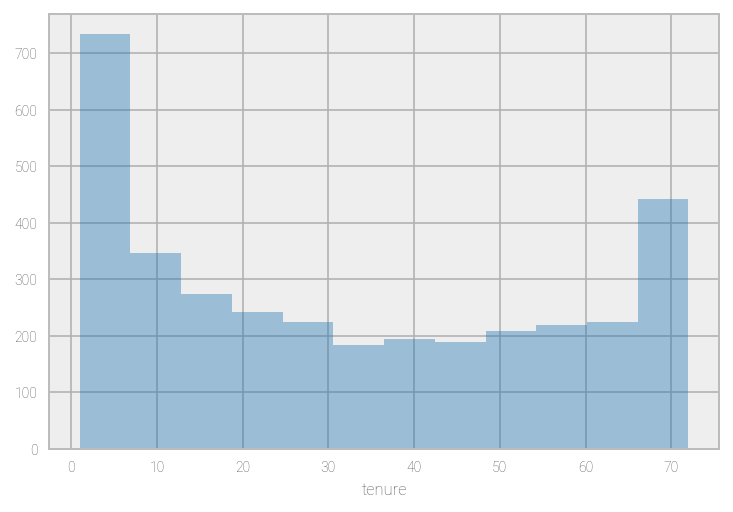

In [7]:
get_ipython().magic(u'matplotlib inline')
import matplotlib.pyplot as plt
import seaborn as sb 
sb.distplot(sample_data['tenure'], kde=False)

We can examine feature differences in the distribution of our features when we condition (split) our data.

[BoxPlot docs](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.boxplot.html)

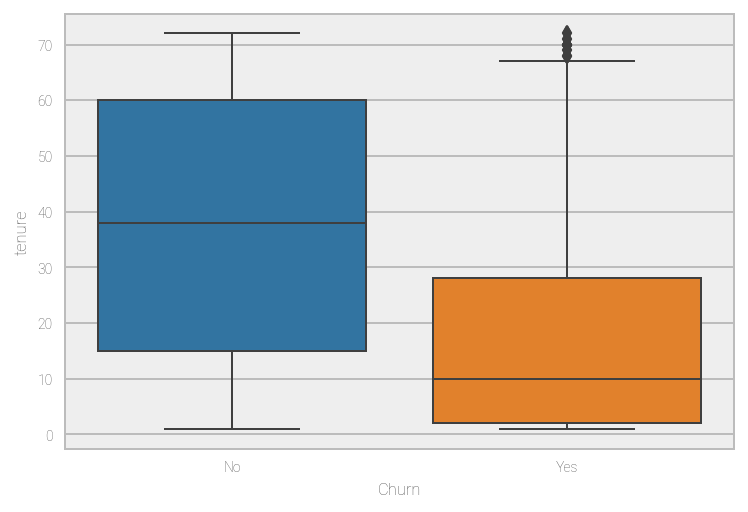

In [8]:
sb.boxplot(x="Churn", y="tenure", data=sample_data)

## Joint Distributions

Looking at joint distributions of data can also tell us a lot, particularly about redundant features. [Seaborn's PairPlot](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot) let's us look at joint distributions for many variables at once.

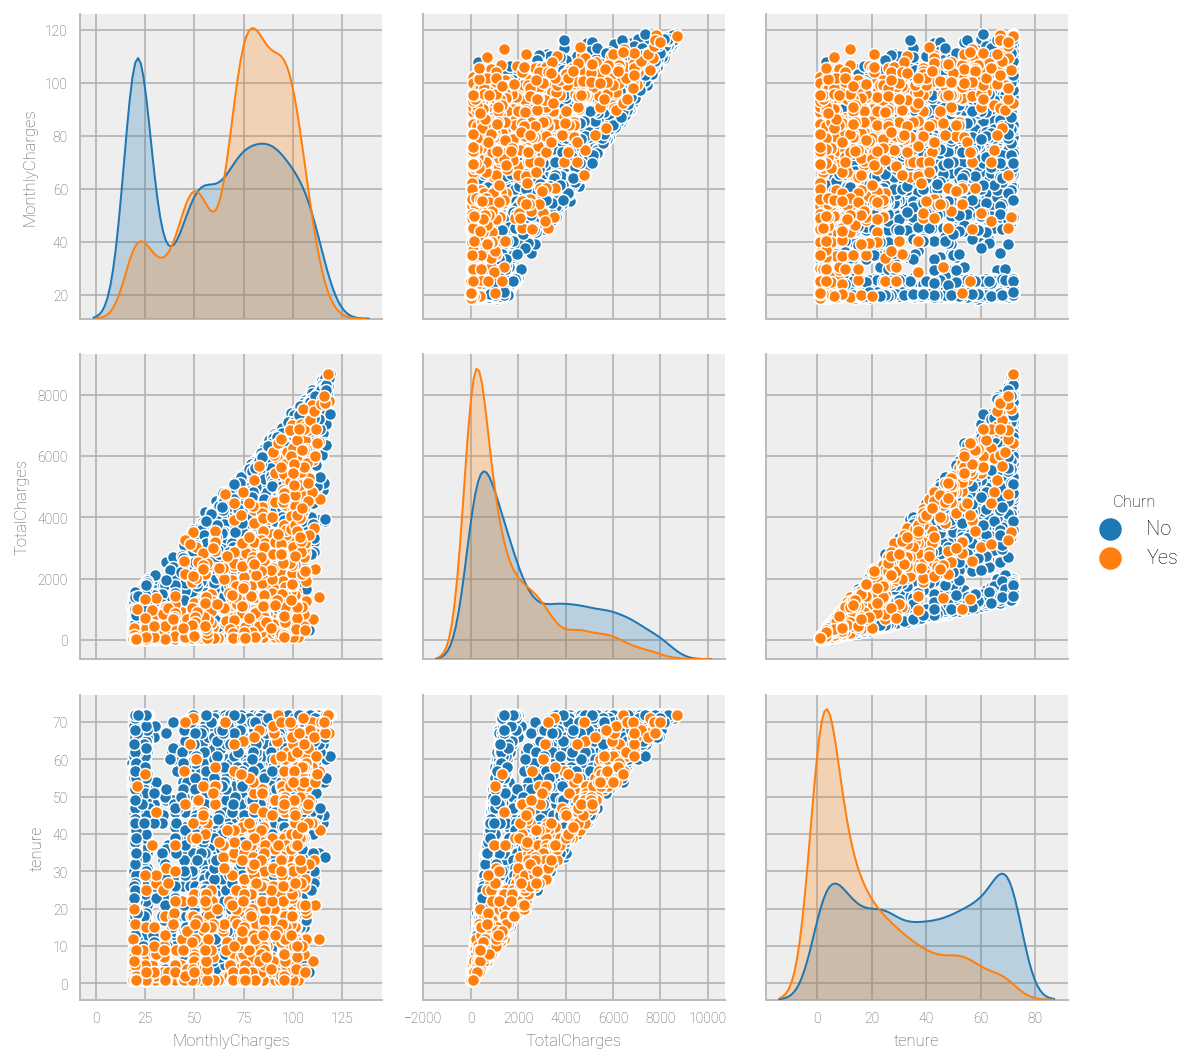

In [9]:
example_numeric_data = sample_data[["MonthlyCharges", "TotalCharges","tenure","Churn"]]
#                                       "citricAcid", "residualSugar", 
sb.pairplot(example_numeric_data, hue="Churn")

In [10]:
spark.stop()